# Visual comparison of genetic variant frequencies: In-house vs ALFA database

This analysis aimed to visually compare the frequencies of variant alleles derived from in-house African genetic data to that of data obtained from the [NCBI ALFA database](https://www.ncbi.nlm.nih.gov/snp/docs/gsr/alfa/) for African, European and Asian populations. 

To achieve this, the following steps were performed: 

1. In-house Data Generation: In-house genetic variant allele count data was generated from genetic information obtained from the [GnomAD 1000 Genomes and HGDP datasets](https://gnomad.broadinstitute.org/news/2021-10-gnomad-v3-1-2-minor-release/) for African population. This data was prepared for analysis by following the steps outlined in the `Notebooks\Data_preparation\2-IH_allele_counts.ipynb` Jupyter notebook. The prepared data is stored in the `Data\Processed\IH_allele_counts_fishers.csv` and `Data\Processed\IH_allele_counts.csv` files.
2. ALFA Data Retrieval: Variant allele count data for variants with rsIDs was retrieved from the NCBI ALFA database. This data was prepared for analysis by following the steps outlined in the  `Notebooks\Data_preparation\3-ALFA_allele_counts_a.ipynb` and `Notebooks\Data_preparation\3-ALFA_allele_counts_b.ipynb` notebooks. The prepared data is stored in `Data\Processed\ALFA_allele_counts_b.csv`
3. Data Integration: The variant allele count data generated in-house and the data fetched from ALFA were combined into a unified dataframe for analysis.
4. Allele Frequency Calculation: Allele frequencies were computed for both the in-house and ALFA datasets.
5. CCC Calculation: A comparison was conducted between the variant allele frequencies of the Recent African population and those of the ALFA Recent African (African Others), East Asian, South Asian, and European populations. The Concordance Correlation Coefficient (CCC) was calculated for each population pair comparison to gauge the degree of correlation within their allele frequency data.
6. Visualising Correlation: The correlation in allele frequency data for the compared population pairs was visually represented through scatter plots.

## Imports

Notebook setup

In [1]:
import os
import sys

from dotenv import load_dotenv

load_dotenv()

PROJECT_ROOT = os.getenv("PROJECT_ROOT")
if PROJECT_ROOT not in sys.path:
    os.chdir(PROJECT_ROOT + "/Notebooks")
    sys.path.append(PROJECT_ROOT)

import numpy as np
import pandas as pd
import seaborn as sns
import upsetplot
from matplotlib import pyplot as plt
import plotly.express as px
import Utils.constants as constants
import Utils.functions as functions

Import in-house variant allele count data

In [2]:
ih_data = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "IH_allele_counts_fishers.csv",
    )
).drop(columns="Unnamed: 0")

ih_data.head(5)

,VAR_NAME,ID,REF,ALT,GENE,POS,ALT_CT_IH_ACB,ALT_CT_IH_ASW,ALT_CT_IH_African,ALT_CT_IH_CA,...,ALT_CT_IH_SA,ALT_CT_IH_WA,CORR_REF_CT_IH_ACB,CORR_REF_CT_IH_ASW,CORR_REF_CT_IH_African,CORR_REF_CT_IH_CA,CORR_REF_CT_IH_EA,CORR_REF_CT_IH_Recent African,CORR_REF_CT_IH_SA,CORR_REF_CT_IH_WA
0,chr11:34438836T-C,34438836_C_T,T,C,CAT,34438836,0,0,1,0,...,0,0,228,142,1977,80,217,1607,28,1282
1,chr11:34438889G-C,34438889_C_G,G,C,CAT,34438889,0,0,1,0,...,1,0,228,142,1977,80,218,1607,27,1282
2,chr11:34438910C-T,34438910_T_C,C,T,CAT,34438910,0,0,0,0,...,0,0,228,142,1978,80,218,1608,28,1282
3,chr11:34439179A-G,34439179_G_A,A,G,CAT,34439179,0,0,0,0,...,0,0,228,142,1978,80,218,1608,28,1282
4,chr11:34439188C-G,34439188_G_C,C,G,CAT,34439188,0,0,0,0,...,0,0,228,142,1978,80,218,1608,28,1282


Import ALFA variant allele count data

In [3]:
alfa_data = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "ALFA_allele_counts_b.csv",
    )
).drop(columns="Unnamed: 0")

alfa_data.head(5)

,variant_id,reference_allele,alternate_allele,ALT_CT_ALFA_African,ALT_CT_ALFA_African American,ALT_CT_ALFA_African Others,ALT_CT_ALFA_Asian,ALT_CT_ALFA_East Asian,ALT_CT_ALFA_European,ALT_CT_ALFA_Latin American 1,...,REF_CT_ALFA_African Others,REF_CT_ALFA_Asian,REF_CT_ALFA_East Asian,REF_CT_ALFA_European,REF_CT_ALFA_Latin American 1,REF_CT_ALFA_Latin American 2,REF_CT_ALFA_Other,REF_CT_ALFA_Other Asian,REF_CT_ALFA_South Asian,REF_CT_ALFA_Total
0,rs1000343,C,T,695.0,671.0,24.0,0.0,0.0,49.0,5.0,...,296.0,622.0,490.0,109377.0,673.0,2200.0,5457.0,132.0,184.0,127076.0
1,rs1000989,T,C,1435.0,1388.0,47.0,80.0,55.0,21489.0,123.0,...,135.0,158.0,109.0,37269.0,273.0,2052.0,1371.0,49.0,3283.0,48171.0
2,rs1000990,T,C,798.0,767.0,31.0,42.0,32.0,5355.0,40.0,...,83.0,70.0,54.0,8931.0,106.0,349.0,459.0,16.0,62.0,12125.0
3,rs1005573,C,T,3120.0,3009.0,111.0,63.0,35.0,10693.0,209.0,...,15.0,101.0,69.0,4955.0,87.0,956.0,474.0,32.0,31.0,7130.0
4,rs1007311,A,G,1970.0,1903.0,67.0,88.0,56.0,9154.0,61.0,...,55.0,80.0,56.0,11242.0,85.0,456.0,1538.0,24.0,55.0,15040.0


## Data integration

Filter in-house data for variants with rsIDs. ALFA data is only available for variants with rsIDs.

In [4]:
ih_data_rsids = ih_data[ih_data.VAR_NAME.str.contains("rs")]

Merge in-house and ALFA variant count data

In [5]:
ih_alfa_data = ih_data_rsids.merge(
    alfa_data,
    how="left",
    left_on=["VAR_NAME", "REF", "ALT"],
    right_on=["variant_id", "reference_allele", "alternate_allele"],
).drop(columns=["variant_id", "reference_allele", "alternate_allele"])

ih_alfa_data = ih_alfa_data.replace(np.NAN, 0)

ih_alfa_data.head(5)

,VAR_NAME,ID,REF,ALT,GENE,POS,ALT_CT_IH_ACB,ALT_CT_IH_ASW,ALT_CT_IH_African,ALT_CT_IH_CA,...,REF_CT_ALFA_African Others,REF_CT_ALFA_Asian,REF_CT_ALFA_East Asian,REF_CT_ALFA_European,REF_CT_ALFA_Latin American 1,REF_CT_ALFA_Latin American 2,REF_CT_ALFA_Other,REF_CT_ALFA_Other Asian,REF_CT_ALFA_South Asian,REF_CT_ALFA_Total
0,rs1000343,34452510_T_C,C,T,CAT,34452510,24,17,172,1,...,296.0,622.0,490.0,109377.0,673.0,2200.0,5457.0,132.0,184.0,127076.0
1,rs1000989,110174956_C_T,T,C,COL4A1,110174956,56,44,522,29,...,135.0,158.0,109.0,37269.0,273.0,2052.0,1371.0,49.0,3283.0,48171.0
2,rs1000990,110174971_C_T,T,C,COL4A1,110174971,56,44,519,29,...,83.0,70.0,54.0,8931.0,106.0,349.0,459.0,16.0,62.0,12125.0
3,rs1005573,33026408_T_C,C,T,OLIG2,33026408,204,118,1731,70,...,15.0,101.0,69.0,4955.0,87.0,956.0,474.0,32.0,31.0,7130.0
4,rs1007311,150998920_G_A,A,G,NOS3,150998920,145,88,1133,24,...,55.0,80.0,56.0,11242.0,85.0,456.0,1538.0,24.0,55.0,15040.0


## Allele frequency calculation

Calculate variant allele frequencies for the in-house and ALFA data.

The alternate allele frequency for a variant can be calculated by dividing the alternate allele count of a variant for a specific population group by the sum of the alternate and reference allele counts. 

In [6]:
ih_alfa_data["CORR_IH_Recent African_ALT_AF"] = ih_alfa_data[
    "ALT_CT_IH_Recent African"
] / (
    ih_alfa_data["ALT_CT_IH_Recent African"]
    + ih_alfa_data["CORR_REF_CT_IH_Recent African"]
)
ih_alfa_data["ALFA_African Others_ALT_AF"] = ih_alfa_data[
    "ALT_CT_ALFA_African Others"
] / (
    ih_alfa_data["ALT_CT_ALFA_African Others"]
    + ih_alfa_data["REF_CT_ALFA_African Others"]
)
ih_alfa_data["ALFA_East Asian_ALT_AF"] = ih_alfa_data["ALT_CT_ALFA_East Asian"] / (
    ih_alfa_data["ALT_CT_ALFA_East Asian"] + ih_alfa_data["REF_CT_ALFA_East Asian"]
)
ih_alfa_data["ALFA_South Asian_ALT_AF"] = ih_alfa_data["ALT_CT_ALFA_South Asian"] / (
    ih_alfa_data["ALT_CT_ALFA_South Asian"] + ih_alfa_data["REF_CT_ALFA_South Asian"]
)
ih_alfa_data["ALFA_European_ALT_AF"] = ih_alfa_data["ALT_CT_ALFA_European"] / (
    ih_alfa_data["ALT_CT_ALFA_European"] + ih_alfa_data["REF_CT_ALFA_European"]
)

ih_alfa_data.head(5)

,VAR_NAME,ID,REF,ALT,GENE,POS,ALT_CT_IH_ACB,ALT_CT_IH_ASW,ALT_CT_IH_African,ALT_CT_IH_CA,...,REF_CT_ALFA_Latin American 2,REF_CT_ALFA_Other,REF_CT_ALFA_Other Asian,REF_CT_ALFA_South Asian,REF_CT_ALFA_Total,CORR_IH_Recent African_ALT_AF,ALFA_African Others_ALT_AF,ALFA_East Asian_ALT_AF,ALFA_South Asian_ALT_AF,ALFA_European_ALT_AF
0,rs1000343,34452510_T_C,C,T,CAT,34452510,24,17,172,1,...,2200.0,5457.0,132.0,184.0,127076.0,0.081468,0.075000,0.000000,0.000000,0.000448
1,rs1000989,110174956_C_T,T,C,COL4A1,110174956,56,44,522,29,...,2052.0,1371.0,49.0,3283.0,48171.0,0.262438,0.258242,0.335366,0.339171,0.365720
2,rs1000990,110174971_C_T,T,C,COL4A1,110174971,56,44,519,29,...,349.0,459.0,16.0,62.0,12125.0,0.260572,0.271930,0.372093,0.367347,0.374843
3,rs1005573,33026408_T_C,C,T,OLIG2,33026408,204,118,1731,70,...,956.0,474.0,32.0,31.0,7130.0,0.876244,0.880952,0.336538,0.718182,0.683346
4,rs1007311,150998920_G_A,A,G,NOS3,150998920,145,88,1133,24,...,456.0,1538.0,24.0,55.0,15040.0,0.559701,0.549180,0.500000,0.438776,0.448813


Filter the data to include only the specific comparison populations of interest. Retain the ALFA African Others, EUR, EAS, SAS populations, as well as the averaged Recent African population.

In [7]:
ih_alfa_comparisons = ih_alfa_data[
    [
        "VAR_NAME",
        "GENE",
        "CORR_IH_Recent African_ALT_AF",
        "ALFA_African Others_ALT_AF",
        "ALFA_East Asian_ALT_AF",
        "ALFA_South Asian_ALT_AF",
        "ALFA_European_ALT_AF",
    ]
]

ih_alfa_comparisons.tail(5)

,VAR_NAME,GENE,CORR_IH_Recent African_ALT_AF,ALFA_African Others_ALT_AF,ALFA_East Asian_ALT_AF,ALFA_South Asian_ALT_AF,ALFA_European_ALT_AF
14929,rs9805608,COL4A1,0.128109,0.158654,0.234694,0.464912,0.304903
14930,rs9807869,CARD8,0.297886,0.263158,0.011628,0.000000,0.001629
14931,rs995223,COL4A1,0.432214,0.338095,0.080972,0.153846,0.262911
14932,rs995224,COL4A1,0.210821,0.111111,0.028846,0.016667,0.252304
14933,rs9982080,OLIG2,0.144279,0.114035,0.116279,0.091837,0.105908


Replace missing allele frequencies with 0

In [8]:
ih_alfa_comparisons = ih_alfa_comparisons.replace(np.NAN, 0)

Remove rows with frequencies of 0. We only want to include variants that are present in all comparison populations.

In [9]:
ih_alfa_comparisons = ih_alfa_comparisons[
    (ih_alfa_comparisons["CORR_IH_Recent African_ALT_AF"] != 0)
    & (ih_alfa_comparisons["ALFA_African Others_ALT_AF"] != 0)
    & (ih_alfa_comparisons["ALFA_European_ALT_AF"] != 0)
    & (ih_alfa_comparisons["ALFA_East Asian_ALT_AF"] != 0)
    & (ih_alfa_comparisons["ALFA_South Asian_ALT_AF"] != 0)
]

## CCC calculation and visualising correlation

Set plot parameters

In [12]:
sns.set(rc={"figure.figsize": (6, 6)})  # set plot size

plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=constants.MEDIUM_FONT)  # legend fontsize
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

Compare the variant allele frequencies for the Recent African population to that of the ALFA Recent African (African Others), East Asian, South Asian and European populations. Calculate the concordance correlation coefficient (CCC) for each comparison population pair to access the correlation between their allele frequency data. Visualise the correlation of the allele frequency data for the compared population pairs using a scatter plot.

C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_14032023\Utils\functions.py:275: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot_output = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


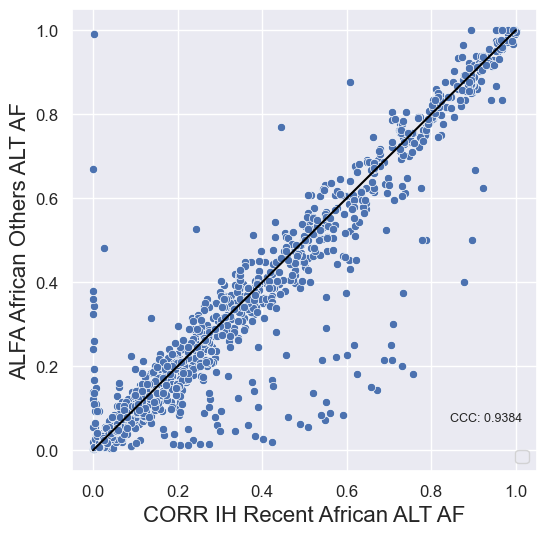

C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_14032023\Utils\functions.py:275: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot_output = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


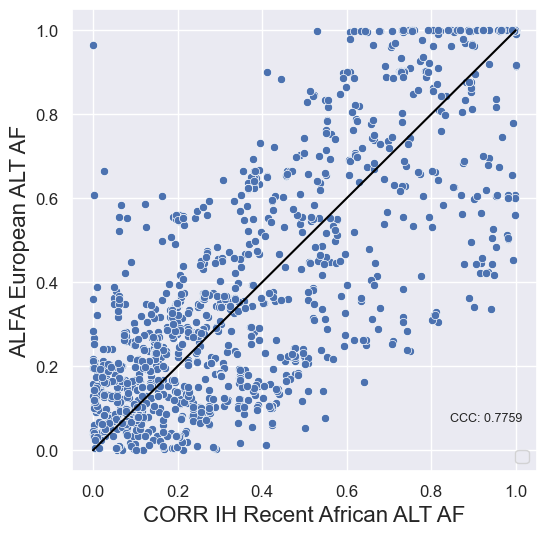

C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_14032023\Utils\functions.py:275: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot_output = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


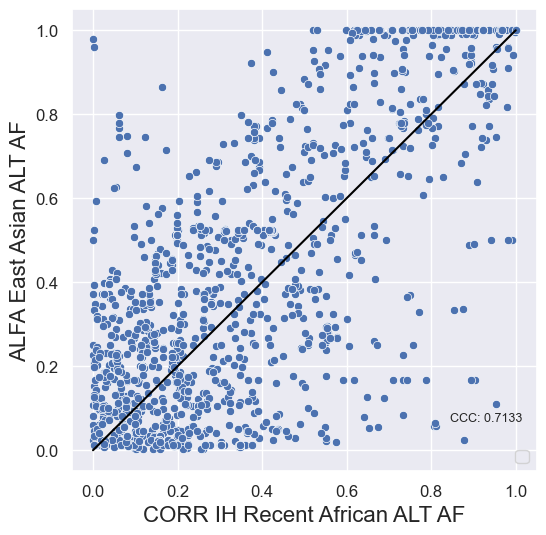

C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_14032023\Utils\functions.py:275: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  plot_output = sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


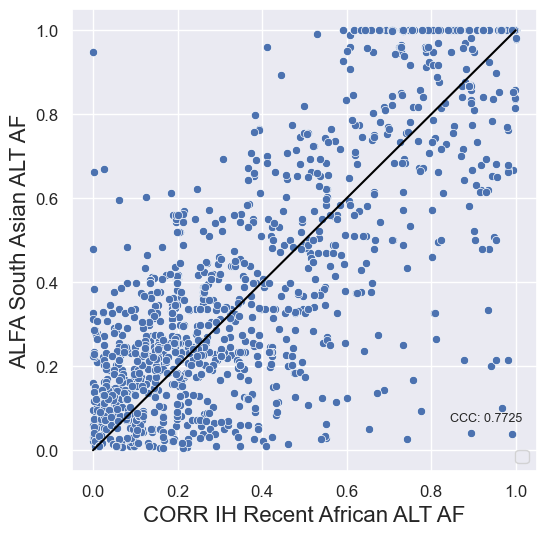

In [13]:
comparison_populations = [
    ["CORR_IH_Recent African_ALT_AF", "ALFA_African Others_ALT_AF"],
    ["CORR_IH_Recent African_ALT_AF", "ALFA_European_ALT_AF"],
    ["CORR_IH_Recent African_ALT_AF", "ALFA_East Asian_ALT_AF"],
    ["CORR_IH_Recent African_ALT_AF", "ALFA_South Asian_ALT_AF"],
]

for pair in comparison_populations:
    # Calculate the concordance correlation coefficient (CCC) for each comparison population pair

    y_true = ih_alfa_comparisons[pair[1]]
    x_pred = ih_alfa_comparisons[pair[0]]
    ccc = round(functions.calculate_ccc(y_true, x_pred), 4)

    # Create a scatter plot with an identity line comparing the non-imputed in-house data to that of the alfa. Annotate the plot with the concordance correlation coefficients of the data

    impute_scatter = functions.create_plot(
        plot_type="scatterplot",
        x=ih_alfa_comparisons[pair[0]],
        y=ih_alfa_comparisons[pair[1]],
        data=ih_alfa_comparisons,
        palette=sns.color_palette("mako", 1),
    )
    impute_scatter.set(
        xlabel=pair[0].replace("_", " "), ylabel=pair[1].replace("_", " ")
    )
    plt.plot([0, 1], [0, 1], color="black")
    plt.text(0.845, 0.07, "CCC: " + str(ccc), fontsize=9)
    plt.legend(loc="lower right")

    plt.savefig(
        "..\Results\Figures\Allele_frequency_comparison_"
        + pair[0]
        + ", "
        + pair[1]
        + ".png",
        dpi=600,
    )
    plt.show()